In [2]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import re

In [3]:
df = pd.read_csv("../data/DataScientist.csv")

print(df.shape)
df.head(3)
df = df.drop(['Unnamed: 0', "index"], axis = 1)
df.head()

(3909, 17)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [4]:
# Clean Company Names

def cleanCompName(name): 
    if name.find("\n") != -1:
        newname = name[0:name.find("\n")]
    else:
        newname = name
    return newname

df["Company Name"] = df["Company Name"].map(cleanCompName)

In [5]:
#df["State Location"] = df.Location.apply(lambda x : x[-2:])
'''def correct_endings(ending):
    correct = ending
    if ending == "da":
        correct = "Canada"
    elif ending == "en":
        correct = "Sweden"
    elif ending == "ny":
        correct = "Germany"
    elif ending == "da":
        correct = "Canada"
    return correct'''

df["State Headquarter"] = df.Headquarters.apply(lambda x : x.split()[-1]).apply(lambda x : x if x != "Kingdom" else "United Kingdom")
df["State Location"] = df.Location.apply(lambda x : x[-2:])

In [6]:
# convert min and max salary to numbers

def averageSalary(salary):
    min_salary = int(re.findall(r'\d+', salary)[0])
    max_salary = int(re.findall(r'\d+', salary)[1])
    average_salary = (min_salary + max_salary) / 2 * 1000
    #min_salary = min_salary[1:]
    #min_salary = int(min_salary)
    return average_salary

df["average_salary"] = df["Salary Estimate"].apply(averageSalary)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State Headquarter,State Location,average_salary
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,Canada,NY,146000.0
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,NY,NY,146000.0
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,NY,NY,146000.0
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,NJ,NJ,146000.0
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,NY,NY,146000.0


In [7]:
df.keys()

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'State Headquarter', 'State Location', 'average_salary'],
      dtype='object')

In [8]:
# disabling all -1 values

df["Rating"] = df["Rating"].apply(lambda x : float(x)).apply(lambda x : x if x != -1 else 0)

df["Founded"] = df["Founded"].apply(lambda x : x if x != -1 else "Unknown")
df["Sector"] = df["Sector"].apply(lambda x : x if x != "-1" else "Unknown")
df["Industry"] = df["Industry"].apply(lambda x : x if x != "-1" else "Unknown")
df["Competitors"] = df["Competitors"].apply(lambda x : x if x != "-1" else "Unknown")
df["Easy Apply"] = df["Easy Apply"].apply(lambda x : x if x != "-1" else "Unknown")

## Which Job Titles and which Keywords are being used?

In [9]:
jobs_names = df["Job Title"].unique()                          # Which titles are used for the jobs?
jobs_names_df = pd.DataFrame(jobs_names)
jobs_names_df

,0
0,Senior Data Scientist
1,"Data Scientist, Product Analytics"
2,Data Science Manager
3,Data Analyst
4,"Director, Data Science"
...,...
2074,Software Engineer - Senior Data Analyst
2075,Columbus Data Science Tutor Jobs
2076,Cyber Security Data Engineer
2077,Security Analytics Data Engineer


In [10]:
job_list = []
for job in jobs_names:
    job2 = job.split()
    for word in job2:
        word = word.translate(word.maketrans("", "", "!$%&'()*,-./:;<=>?@[\]^`{|}~"))
        job_list.append(word)

jobs_df = pd.DataFrame(job_list, columns = ["Keywords"])
jobs_df.head(20)

,Keywords
0,Senior
1,Data
2,Scientist
3,Data
4,Scientist
5,Product
6,Analytics
7,Data
8,Science
9,Manager


In [11]:
keywords = pd.DataFrame(jobs_df["Keywords"].value_counts().reset_index())                       # Which keywords are being used?
keywords.columns = ["Keyword", "Count"]

keywords = keywords[(keywords.Keyword != "") & (keywords.Keyword != "and") & (keywords.Keyword != "Sr")]
keywords

,Keyword,Count
0,Data,1325
1,Scientist,945
3,Analyst,383
4,Engineer,378
5,Senior,237
...,...,...
1716,Transportation,1
1717,Americas,1
1718,PHYSICAL,1
1719,GENERAL,1


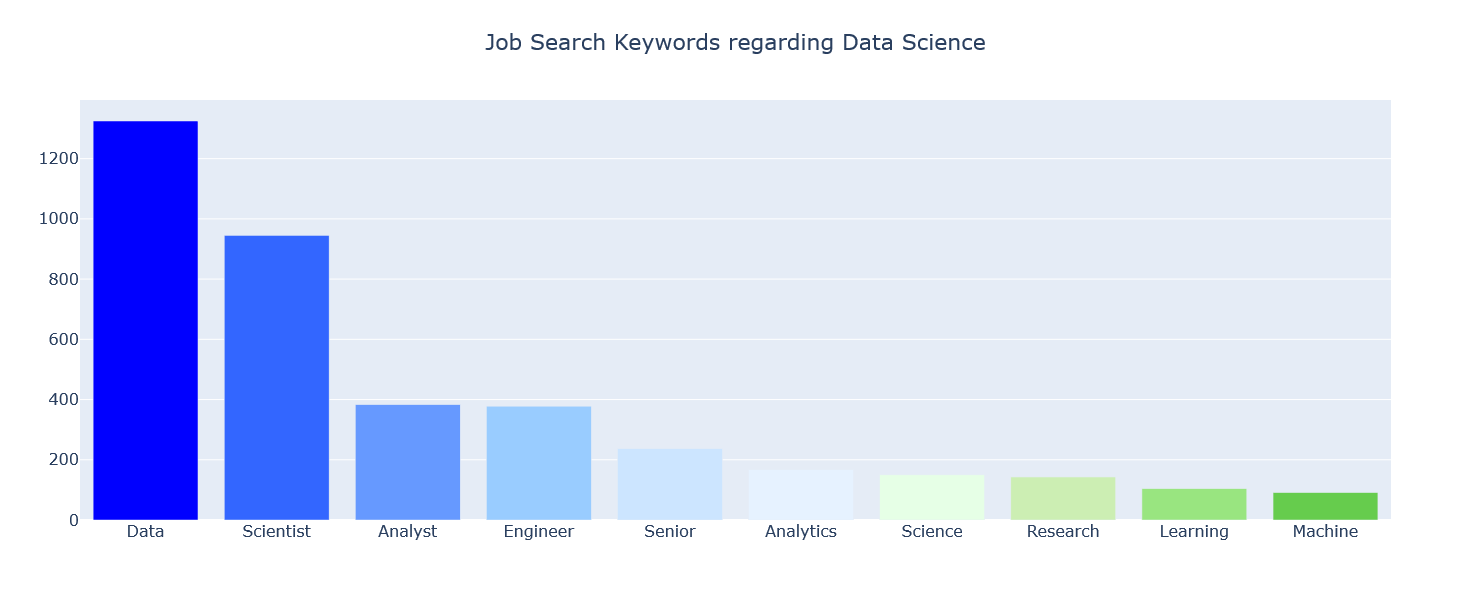

In [72]:
colors = [
    '#0000FF',  # Blue
    '#3366FF',
    '#6699FF',
    '#99CCFF',
    '#CCE5FF',
    '#E6F2FF',
    '#E6FFE6',
    '#CCEEB3',
    '#99E580',
    '#66CC4D',
    '#33B319',
    '#009900',  # Green
]

def plotlyplot(df,number,title):
    fig = go.Figure()
    fig.add_trace(go.Bar(x = df[df.columns[0]][:number], y = df[df.columns[1]][:number], marker_color = colors))

    fig.update_layout(font_size = 16, height = 600, width = 800, title = title, title_x = 0.5)

    fig.show()

plotlyplot(keywords, 10, "Job Search Keywords regarding Data Science")

### Which companies are offering the most positions?

In [30]:
pos_by_cpy = pd.DataFrame(df["Company Name"].value_counts().head(10)).reset_index()
pos_by_cpy.columns = ["Company","Count"]
pos_by_cpy

,Company,Count
0,Apple,60
1,IBM,57
2,Amazon,47
3,"Staffigo Technical Services, LLC",28
4,Facebook,25
5,Diverse Lynx,25
6,Solekai Systems Corp,24
7,Southwest Research Institute,23
8,Varsity Tutors,21
9,Humana,20


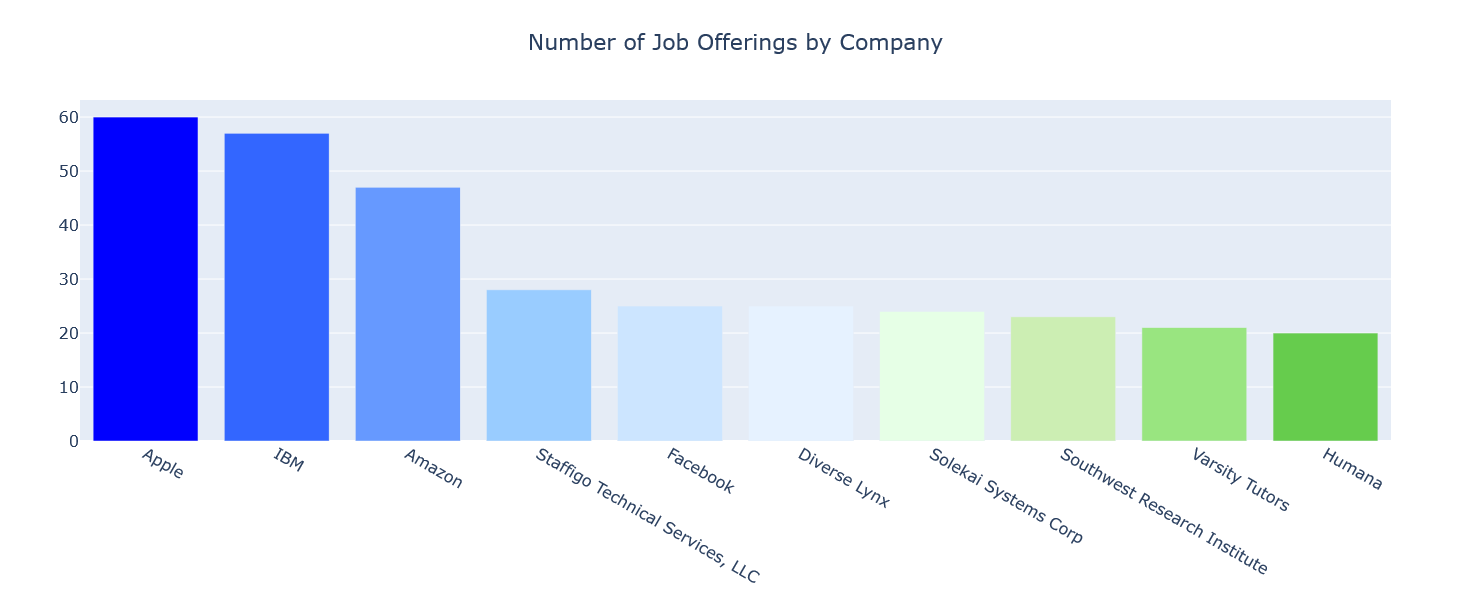

In [74]:
plotlyplot(pos_by_cpy,10, "Number of Job Offerings by Company")

### Which companies are rated the highest?

In [46]:
ratings = df.groupby(by = ["Company Name"]).Rating.mean().sort_values(ascending = False)

ratings_df = pd.DataFrame(ratings).reset_index()
ratings_df.columns = ["Company","Count"]
ratings_df

,Company,Count
0,"Infogium Technologies, LLC",5.0
1,Connect International,5.0
2,Informatic Technologies Inc,5.0
3,Indrasol,5.0
4,Sense360,5.0
...,...,...
2058,MessageControl,0.0
2059,Medical Cost Containment Services Inc.,0.0
2060,"Mastery Logistics Systems, Inc.",0.0
2061,"Marker, Inc.",0.0


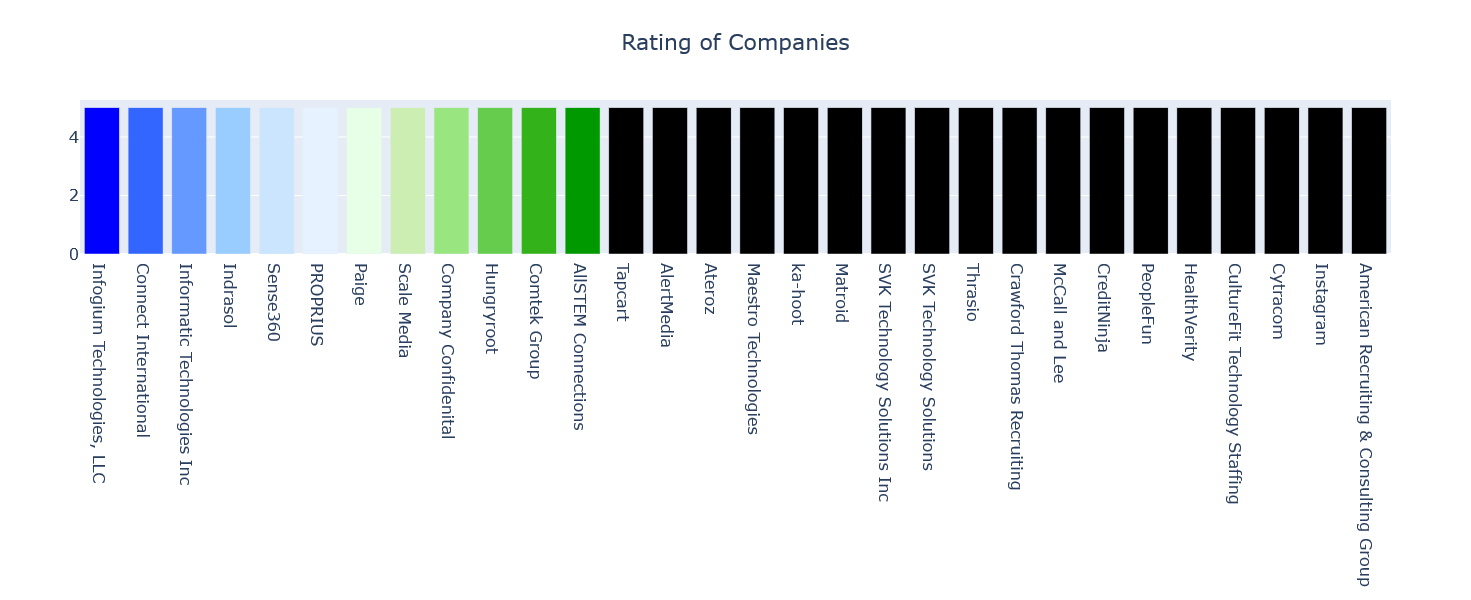

In [75]:
plotlyplot(ratings_df,30, "Rating of Companies")

### Which companies pay most based on average salary estimate?

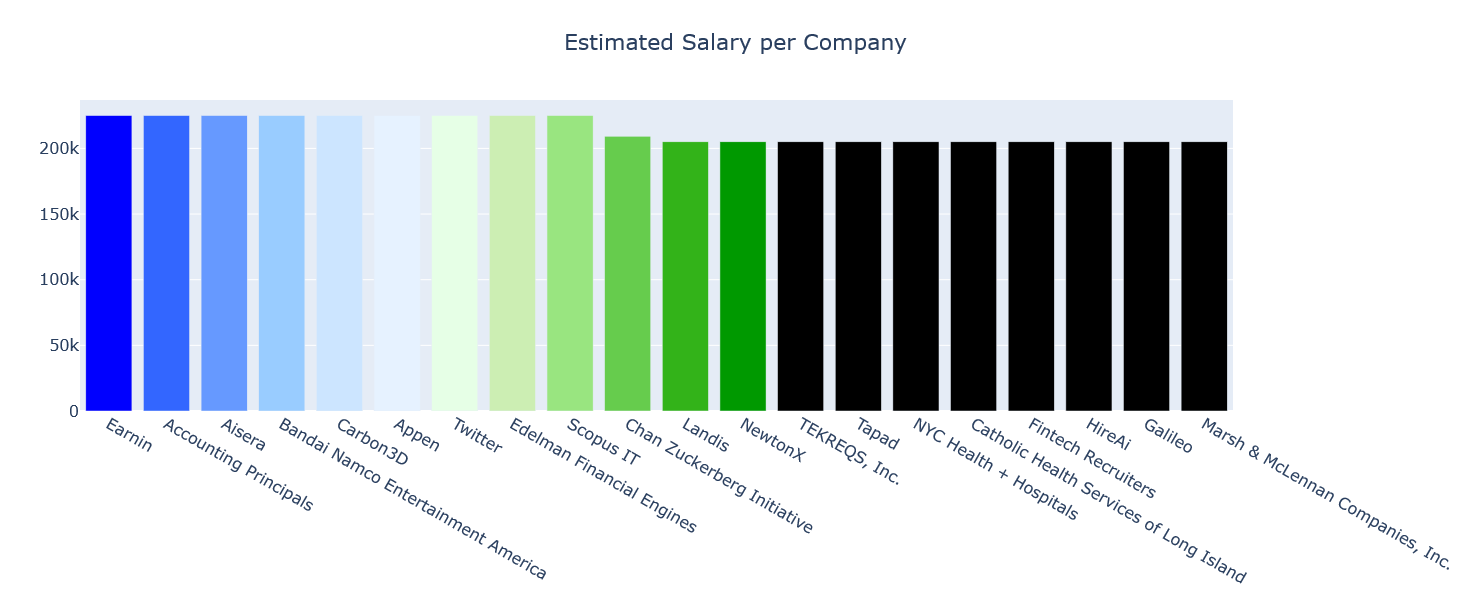

In [76]:
payment = df.groupby(by = ["Company Name"]).average_salary.mean().sort_values(ascending = False)

payment_df = pd.DataFrame(payment).reset_index()
payment_df.columns = ["Company","Payment"]
payment_df

plotlyplot(payment_df,20, "Estimated Salary per Company")

### What are the main industries?

In [77]:
industries = df["Industry"].value_counts()
industry_df = pd.DataFrame(industries[1:]).reset_index()
industry_df.columns = ["Company","Payment"]
industry_df

,Company,Payment
0,IT Services,472
1,Staffing & Outsourcing,313
2,Biotech & Pharmaceuticals,293
3,Computer Hardware & Software,264
4,Internet,238
...,...,...
90,Commercial Equipment Rental,1
91,Metals Brokers,1
92,Truck Rental & Leasing,1
93,Beauty & Personal Accessories Stores,1


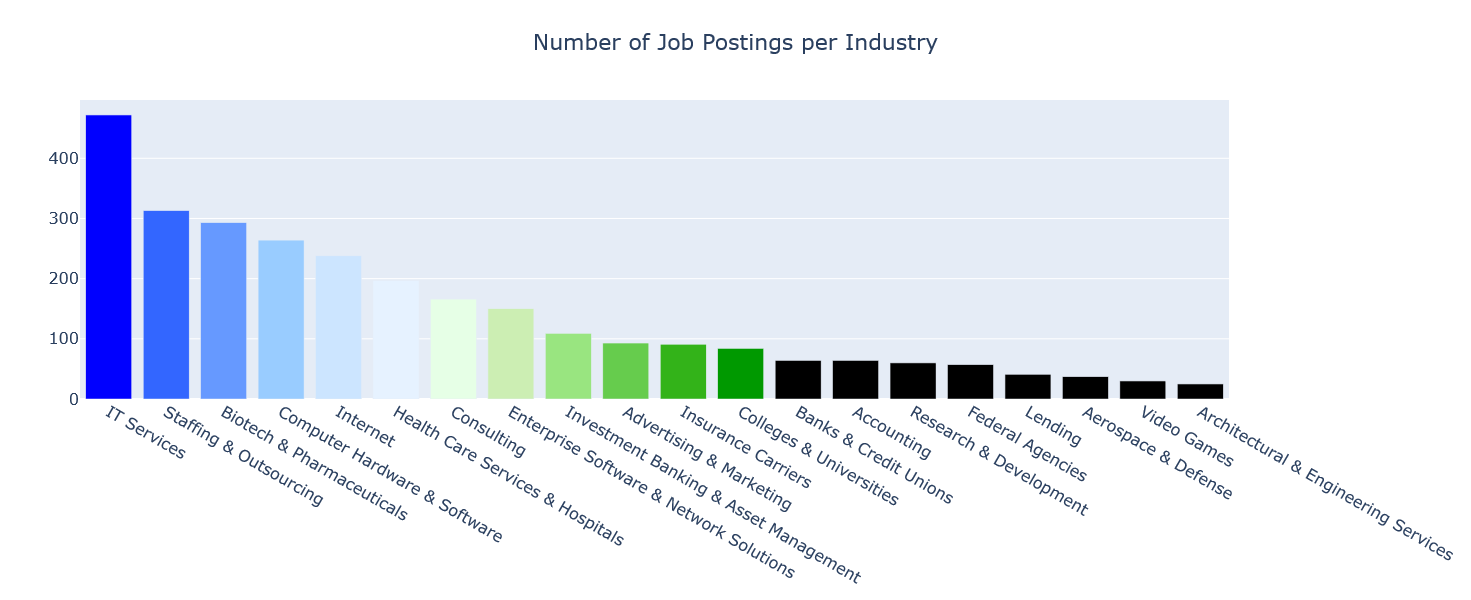

In [79]:
plotlyplot(industry_df,20, "Number of Job Postings per Industry")

### Which industry pays most?

In [82]:
industrypay = df.groupby(by = ["Industry"]).average_salary.mean().sort_values(ascending = False).round(2)

industrypay_df = pd.DataFrame(industries).reset_index()
industrypay_df.columns = ["Company","Payment"]
industrypay_df

,Company,Payment
0,Unknown,546
1,IT Services,472
2,Staffing & Outsourcing,313
3,Biotech & Pharmaceuticals,293
4,Computer Hardware & Software,264
...,...,...
91,Commercial Equipment Rental,1
92,Metals Brokers,1
93,Truck Rental & Leasing,1
94,Beauty & Personal Accessories Stores,1


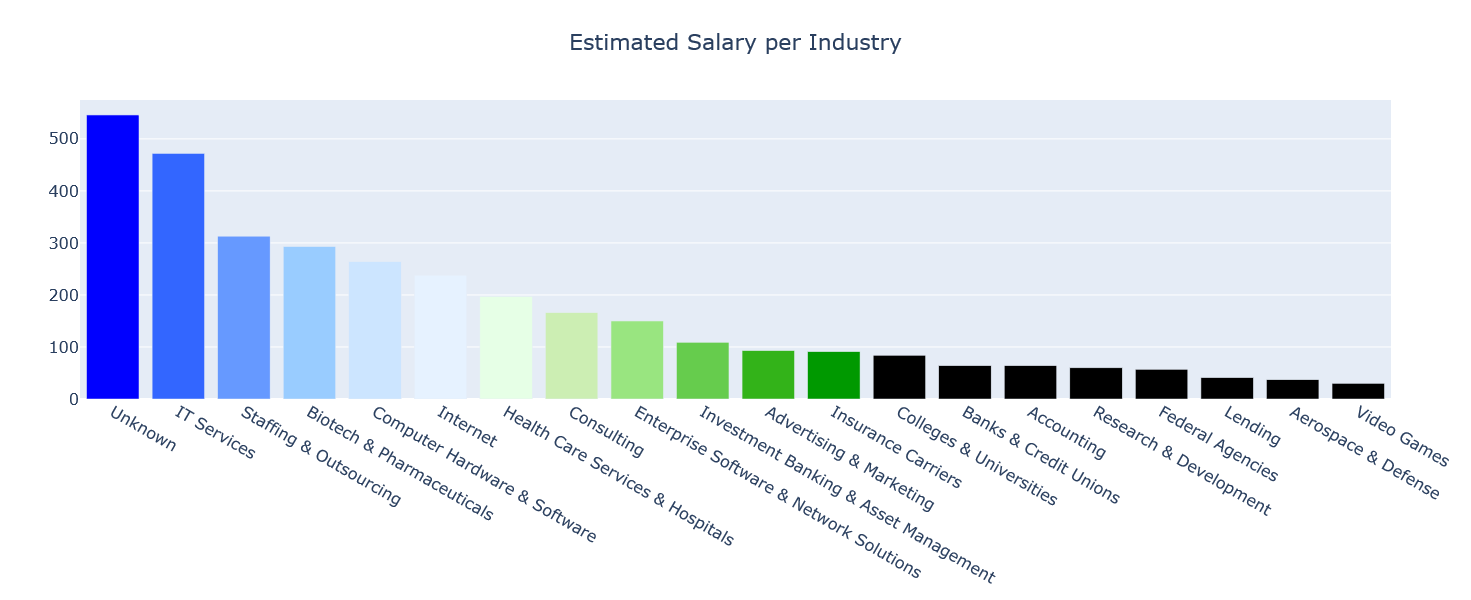

In [83]:
plotlyplot(industrypay_df,20, "Estimated Salary per Industry")

### In which state do you earn the most money as a Data Scientist?

In [481]:
df.groupby(by = ["State Location"]).average_salary.mean().sort_values(ascending = False).round(2).head(10)

State Location
NY    135677.32
DE    133550.00
CA    132782.97
NJ    118687.50
om     99625.00
AZ     97349.15
TX     95347.17
PA     94675.93
OH     94093.22
IL     85004.13
Name: average_salary, dtype: float64

### In which state are the Data Science Companies located?

In [482]:
df["State Headquarter"].value_counts().head(20)

CA                916
TX                458
NY                391
IL                251
-1                240
NJ                188
PA                149
VA                118
OH                103
United Kingdom     90
AZ                 83
WA                 68
FL                 65
MA                 60
DC                 54
MO                 49
GA                 48
MI                 46
MD                 44
India              41
Name: State Headquarter, dtype: int64

In [491]:
keywords_skills = {
    'airflow': 'Airflow', 'alteryx': 'Alteryx', 'aspnet': 'ASP.NET', 'atlassian': 'Atlassian', 
    'excel': 'Excel', 'powerbi': 'Power BI', 'tableau': 'Tableau', 'srss': 'SRSS', 'word': 'Word', 
    'unix': 'Unix', 'vue': 'Vue', 'jquery': 'jQuery', 'linuxunix': 'Linux / Unix', 'seaborn': 'Seaborn', 
    'microstrategy': 'MicroStrategy', 'spss': 'SPSS', 'visio': 'Visio', 'gdpr': 'GDPR', 'ssrs': 'SSRS', 
    'spreadsheet': 'Spreadsheet', 'aws': 'AWS', 'hadoop': 'Hadoop', 'ssis': 'SSIS', 'linux': 'Linux', 
    'sap': 'SAP', 'powerpoint': 'PowerPoint', 'sharepoint': 'SharePoint', 'redshift': 'Redshift', 
    'snowflake': 'Snowflake', 'qlik': 'Qlik', 'cognos': 'Cognos', 'pandas': 'Pandas', 'spark': 'Spark', 'outlook': 'Outlook'
}

keywords_programming = {
    'sql' : 'SQL', 'python' : 'Python', 'r' : 'R', 'c':'C', 'c#':'C#', 'javascript' : 'JavaScript', 'js':'JS', 'java':'Java', 
    'scala':'Scala', 'sas' : 'SAS', 'matlab': 'MATLAB', 'c++' : 'C++', 'perl' : 'Perl','go' : 'Go',
    'typescript' : 'TypeScript','bash':'Bash','html' : 'HTML','css' : 'CSS','php' : 'PHP','powershell' : 'Powershell',
    'rust' : 'Rust', 'kotlin' : 'Kotlin','ruby' : 'Ruby','dart' : 'Dart','assembly' :'Assembly',
    'swift' : 'Swift','vba' : 'VBA','lua' : 'Lua','groovy' : 'Groovy','delphi' : 'Delphi','objectivec' : 'Objective-C',
    'haskell' : 'Haskell','elixir' : 'Elixir','julia' : 'Julia','clojure': 'Clojure','solidity' : 'Solidity',
    'lisp' : 'Lisp','f#':'F#','fortran' : 'Fortran','erlang' : 'Erlang','apl' : 'APL','cobol' : 'COBOL',
    'ocaml': 'OCaml','crystal':'Crystal','javascripttypescript' : 'JavaScript / TypeScript','golang':'Golang',
    'nosql': 'NoSQL', 'mongodb' : 'MongoDB','tsql' :'Transact-SQL','vba' : 'Visual Basic',
    'pascal':'Pascal', 'mongo' : 'Mongo', 'plsql' : 'PL/SQL','sass' :'SASS', 'vbnet' : 'VB.NET','mssql' : 'MSSQL',
}

In [525]:
word_count = {}

for job_desc_text in df["Job Description"]:
    
    job_desc_text = job_desc_text.translate(job_desc_text.maketrans("", "", "!$%&'()*,-./:;<=>?@[\]^`{|}~"))
    job_desc_text = job_desc_text.lower()
    job_desc_words = job_desc_text.split()

    for word in job_desc_words:
        if word in keywords_programming.keys():
            word_count[word] = word_count.get(word, 0) + 1
            
        if word in keywords_skills.keys():
            word_count[word] = word_count.get(word, 0) + 1

In [526]:
word_count_sorted = dict(sorted(word_count.items(), key=lambda x: x[1]))
reversed_dict = dict(reversed(word_count_sorted.items()))
reversed_dict

{'sql': 2986,
 'python': 2627,
 'r': 1259,
 'aws': 1155,
 'spark': 1128,
 'tableau': 856,
 'excel': 793,
 'hadoop': 786,
 'java': 769,
 'sas': 516,
 'scala': 447,
 'nosql': 354,
 'c++': 290,
 'word': 266,
 'redshift': 225,
 'linux': 220,
 'matlab': 210,
 'powerpoint': 196,
 'sap': 195,
 'c': 191,
 'snowflake': 190,
 'go': 187,
 'javascript': 181,
 'airflow': 164,
 'pandas': 157,
 'spss': 140,
 'ssis': 138,
 'mongodb': 134,
 'unix': 113,
 'perl': 98,
 'powerbi': 95,
 'c#': 87,
 'alteryx': 85,
 'ssrs': 84,
 'outlook': 78,
 'bash': 72,
 'tsql': 58,
 'qlik': 55,
 'visio': 53,
 'cognos': 49,
 'plsql': 48,
 'ruby': 48,
 'vba': 46,
 'sharepoint': 45,
 'atlassian': 36,
 'html': 32,
 'microstrategy': 31,
 'spreadsheet': 30,
 'mongo': 29,
 'crystal': 28,
 'powershell': 27,
 'css': 22,
 'seaborn': 21,
 'linuxunix': 21,
 'julia': 21,
 'php': 21,
 'mssql': 19,
 'js': 17,
 'assembly': 11,
 'golang': 10,
 'jquery': 8,
 'groovy': 7,
 'swift': 7,
 'gdpr': 6,
 'rust': 5,
 'clojure': 4,
 'kotlin': 4,
 't